# Test tracker

In [5]:
from Game import RPS_Game
from CVTracker import CVTracker

import cv2
import sys



tracker = CVTracker()
tracker.absdiff_thresh = 30
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    if not ret:
        print('Cannot read webcam file')
        sys.exit()
    tracker.AD_tracker(frame)
    
    #tracker.box
    cv2.imshow("frame", frame)
    cv2.imshow("thres", tracker.thresh)
    
    k = cv2.waitKey(17) & 0xff
    if k == 27: 
        cap.release()
        cv2.destroyAllWindows()
        break
    

#app = RPS_Game()
#app.run()

test


In [4]:
cap.release()
cv2.destroyAllWindows()

# Test game

In [1]:
from Game import RPS_Game
app = RPS_Game()
app.run()

# Test Classifier

In [3]:
from DLClassifier import DLClassifier
from CVClassifier import CVClassifier
import numpy as np
import cv2

app.countDown(hand_position = None, start = True)

#det = DLClassifier("weights/detector.ckpt")
det = CVClassifier(invert = True)

np.set_printoptions(precision=1, suppress=True)

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    #Detect objects
    det.detect_from_cvmat(frame)
    #res = det.show_results(frame,yolo.result)
    #print(str(det.result) + " "*20, sep=' ', end='\r', flush=True)
    print(str(app.countDown(hand_position = det.y, start = False)) + " "*20, sep=' ', end='\r', flush=True)

    # Display the resulting frame
    #cv2.imshow('frame: ',frame)
    cv2.imshow('frame: ',det.image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

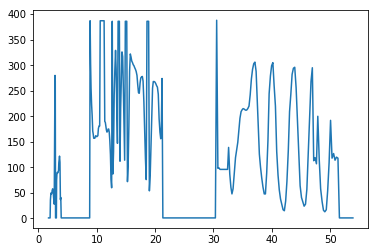

In [6]:
from matplotlib import pyplot as plt
plt.plot(app.hand_time,app.hand_pos)
plt.show()